In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [40]:
import tensorflow as tf
tensorflow__version__ = tf.__version__
print(tensorflow__version__)

2.18.0


In [41]:
dataset = pd.read_csv('heart.csv')

In [42]:
dataset.shape

(918, 12)

In [43]:
dataset.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [44]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [45]:
dataset.describe()


,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [46]:
print(dataset.isnull().sum())

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64


In [47]:
# One-hot encode categorical columns
categorical_cols = ['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']
dataset_encoded = pd.get_dummies(dataset, columns=categorical_cols, drop_first=True)

In [48]:
# Separate features and target
x = dataset_encoded.drop('HeartDisease', axis=1)
y = dataset_encoded['HeartDisease']

In [49]:
from sklearn.model_selection import train_test_split

x_traink,x_testk,y_traink,y_testk = train_test_split(x,y,test_size=0.2,random_state=0)

In [50]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [51]:
x_traink = sc.fit_transform(x_traink)
x_testk = sc.transform(x_testk)

In [52]:
x_traink

array([[ 1.75354017,  0.40398537, -1.85006457, ...,  1.19939076,
         1.00820807, -0.87431292],
       [-0.81787111, -0.95050604, -1.85006457, ...,  1.19939076,
         1.00820807, -0.87431292],
       [ 1.21782949,  1.48757849,  1.49894114, ..., -0.83375663,
        -0.99185875,  1.14375526],
       ...,
       [ 0.3606924 , -0.24617051,  0.9686819 , ..., -0.83375663,
        -0.99185875,  1.14375526],
       [ 1.11068735,  0.07890743,  0.6895981 , ...,  1.19939076,
        -0.99185875, -0.87431292],
       [-0.71072897, -1.32976364,  0.41051429, ..., -0.83375663,
        -0.99185875,  1.14375526]])

In [53]:
x_testk

array([[ 0.14640812, -0.95050604, -1.85006457, ..., -0.83375663,
         1.00820807, -0.87431292],
       [ 1.32497163, -0.67960776,  0.95937911, ..., -0.83375663,
         1.00820807, -0.87431292],
       [-0.28216042, -1.22140432, -1.85006457, ..., -0.83375663,
         1.00820807, -0.87431292],
       ...,
       [-0.17501829, -1.11304501,  0.28957797, ..., -0.83375663,
        -0.99185875,  1.14375526],
       [-1.78215034, -0.1378112 ,  0.78262603, ..., -0.83375663,
        -0.99185875,  1.14375526],
       [-0.06787615,  1.48757849, -1.85006457, ...,  1.19939076,
         1.00820807, -0.87431292]])

In [54]:
x_traink.shape

(734, 15)

In [55]:
x_testk.shape

(184, 15)

In [56]:
#lets create ANN
#library tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LeakyReLU,PReLU,ELU,ReLU
from tensorflow.keras.layers import Dropout

In [61]:
# Initialize the model
model = Sequential()
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1, activation='sigmoid'))

In [68]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_9 (Dense)                 │ (None, 64)             │         1,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9,413 (36.77 KB)

 Trainable params: 3,137 (12.25 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 6,276 (24.52 KB)

In [63]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy',
                      tf.keras.metrics.Precision(name='precision'),
                      tf.keras.metrics.Recall(name='recall')])

In [65]:
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
history = model.fit(x_traink, y_traink, epochs=100, batch_size=32, validation_split=0.2, callbacks=[early_stop])

Epoch 1/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - accuracy: 0.4131 - loss: 0.7372 - precision: 0.4720 - recall: 0.5070 - val_accuracy: 0.7211 - val_loss: 0.5911 - val_precision: 0.6932 - val_recall: 0.8133
Epoch 2/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7723 - loss: 0.5465 - precision: 0.7709 - recall: 0.8487 - val_accuracy: 0.8299 - val_loss: 0.4783 - val_precision: 0.7976 - val_recall: 0.8933
Epoch 3/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8352 - loss: 0.4560 - precision: 0.8278 - recall: 0.8965 - val_accuracy: 0.8776 - val_loss: 0.4101 - val_precision: 0.8608 - val_recall: 0.9067
Epoch 4/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8589 - loss: 0.3677 - precision: 0.8716 - recall: 0.8874 - val_accuracy: 0.8707 - val_loss: 0.3775 - val_precision: 0.8590 - val_recall: 0.8933
Epoch 5/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8569 - loss: 0.3650 - precision: 0.8734 - recall: 0.8714 - val_accuracy: 0.8776 - val_loss: 0.3629

In [67]:
classifier.get_weights()

[array([[ 5.04499495e-01, -5.20319998e-01, -4.11193162e-01,
          3.61176491e-01,  5.92265725e-02, -5.99429905e-02,
         -4.71073687e-02,  1.23079181e-01, -1.46623760e-01,
          2.49685049e-02, -6.34074807e-02, -2.34352291e-01,
         -3.85698348e-01, -4.41667736e-01,  3.85664999e-01,
          5.19354939e-02],
        [ 5.03450572e-01,  4.72153425e-02, -2.97857404e-01,
          8.62737298e-02, -1.45465136e-03,  2.33093619e-01,
          3.48520160e-01, -5.23799658e-03,  7.00911880e-02,
          7.33004212e-02,  1.35384738e-01,  3.68490458e-01,
         -1.40405238e-01,  2.08640099e-01, -4.60319340e-01,
          2.21601605e-01],
        [-4.37353849e-02, -4.31418419e-04, -4.54342365e-01,
          4.37796712e-01,  1.54319882e-01, -2.56100953e-01,
          5.04625738e-01, -4.36163515e-01,  2.50249743e-01,
          2.38122821e-01,  4.90507901e-01,  1.41052544e-01,
          4.19787467e-01,  2.25030780e-02, -4.17002738e-02,
          1.67486310e-01],
        [-1.9599410

In [69]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report

# Predict on the test set
y_pred_prob = model.predict(x_testk)
y_pred = (y_pred_prob > 0.5).astype(int)

# Metrics
print("Accuracy:", accuracy_score(y_testk, y_pred))
print("Precision:", precision_score(y_testk, y_pred))
print("Recall:", recall_score(y_testk, y_pred))
print(classification_report(y_testk, y_pred))

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Accuracy: 0.8478260869565217
Precision: 0.8495575221238938
Recall: 0.897196261682243
              precision    recall  f1-score   support

           0       0.85      0.78      0.81        77
           1       0.85      0.90      0.87       107

    accuracy                           0.85       184
   macro avg       0.85      0.84      0.84       184
weighted avg       0.85      0.85      0.85       184



Confusion Matrix:
 [[60 17]
 [11 96]]


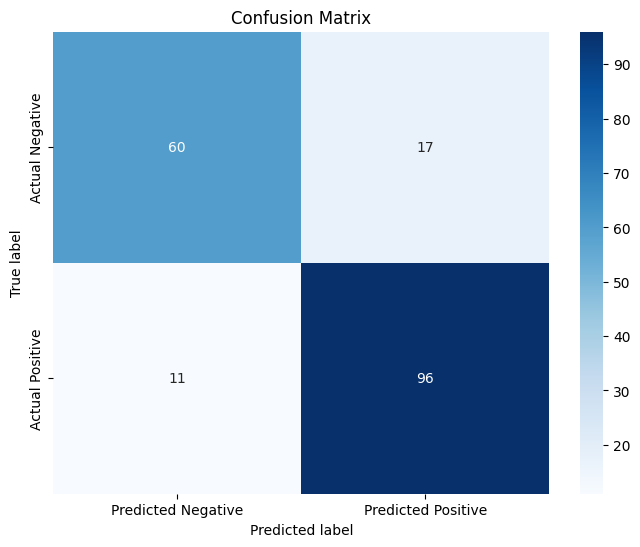

In [74]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
cm = confusion_matrix(y_testk, y_pred)
print("Confusion Matrix:\n", cm)

# Plotting the Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Predicted Negative', 'Predicted Positive'], yticklabels=['Actual Negative', 'Actual Positive'])
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix')
plt.show()


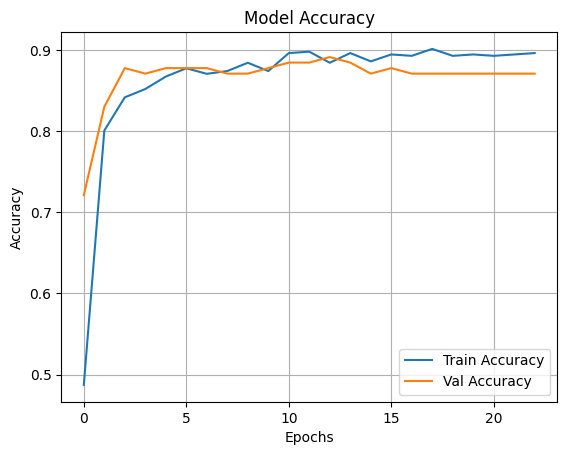

In [70]:
# Accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()



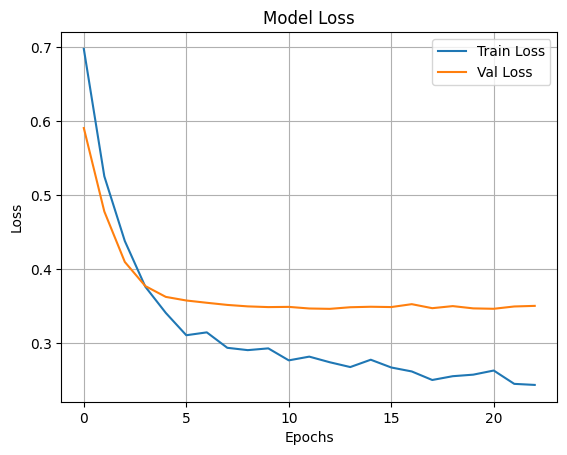

In [71]:
# Loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

In [72]:
!pip install visualkeras pydot graphviz

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 997.4/997.4 kB 27.5 MB/s eta 0:00:00


In [75]:
from tensorflow.keras.utils import plot_model